# NLP Tutorial - Spam Text Message Classification using NLP

- #### Sklearn

- #### Spacy

- #### NLTK


In [1]:
#!pip install scikit-learn

In [2]:
#!pip install -U spacy

In [3]:
#!python -m spacy download en

## Let's Get Started 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spam.tsv', sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df)

5572

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### Balence this data 

In [10]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [11]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [15]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis 

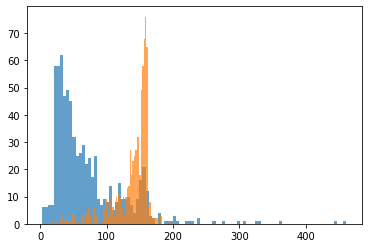

In [16]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

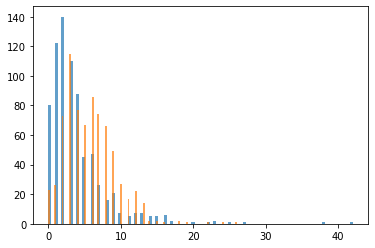

In [17]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

### Data Preparation 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
data.head()

,label,message,length,punct
0,ham,"I'll get there at 3, unless you guys want me t...",69,2
1,ham,Nope watching tv at home... Not going out. V b...,53,7
2,ham,Babe! How goes that day ? What are you up to ?...,126,13
3,ham,No i'm not. I can't give you everything you wa...,363,23
4,ham,hi my darlin im on my way to London and we hav...,158,3


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

In [22]:
### Bag of Words Creation

In [23]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [24]:
X_train_vect.shape

(1045, 3710)

In [25]:
X_train_vect

<1045x3710 sparse matrix of type '<class 'numpy.float64'>'
	with 17818 stored elements in Compressed Sparse Row format>

In [26]:
1045*3708

3874860

### Pipeline and RF 

In [27]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [28]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [29]:
y_pred = clf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 24, 200]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [32]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [33]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [34]:
clf.predict(["you have won tickets to the USA this summer."])

array(['ham'], dtype=object)

### SVM

In [35]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [36]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [37]:
y_pred = clf.predict(X_test)

In [38]:
confusion_matrix(y_test, y_pred)

array([[218,   7],
       [ 17, 207]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.97      0.95       225
        spam       0.97      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [40]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [41]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [42]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)